# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
import plotly.figure_factory as ff
from warnings import filterwarnings

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

filterwarnings("ignore")

# Loading Dataset

In [2]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* There are a total of 1470 entries in the dataset.
* The dataset consists of 26 numeric columns and 9 categorical columns

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

*  We can see that the data has no null values

In [5]:
categorical_columns = df.select_dtypes('object')
categorical_columns

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [6]:
numeric_columns = df.select_dtypes('int64')
numeric_columns

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [7]:
categorical_columns.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [8]:
numeric_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


From the analysis, we can remove 
* EmployeeCount, as all the values are 1
* StandardHours, as all the values are 1
* EmployeeNumber, as it is the number of the employee and wont matter much
* Over18, as all the values are Y

In [9]:
col_to_drop = ['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18']
df = df.drop(col_to_drop, axis=1)

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [11]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(include='number')

In [12]:
# For getting unique values of categorical columns
for i in cat:
    print(f'Unique values of {i} are {set(df[i])}')

Unique values of Attrition are {'No', 'Yes'}
Unique values of BusinessTravel are {'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'}
Unique values of Department are {'Human Resources', 'Sales', 'Research & Development'}
Unique values of EducationField are {'Human Resources', 'Life Sciences', 'Technical Degree', 'Marketing', 'Medical', 'Other'}
Unique values of Gender are {'Male', 'Female'}
Unique values of JobRole are {'Manager', 'Human Resources', 'Manufacturing Director', 'Research Scientist', 'Research Director', 'Sales Executive', 'Sales Representative', 'Laboratory Technician', 'Healthcare Representative'}
Unique values of MaritalStatus are {'Divorced', 'Single', 'Married'}
Unique values of OverTime are {'No', 'Yes'}


# Data Visualization

In [13]:
hr = df.copy(deep=True)

### What is the relationship between attrition and age?

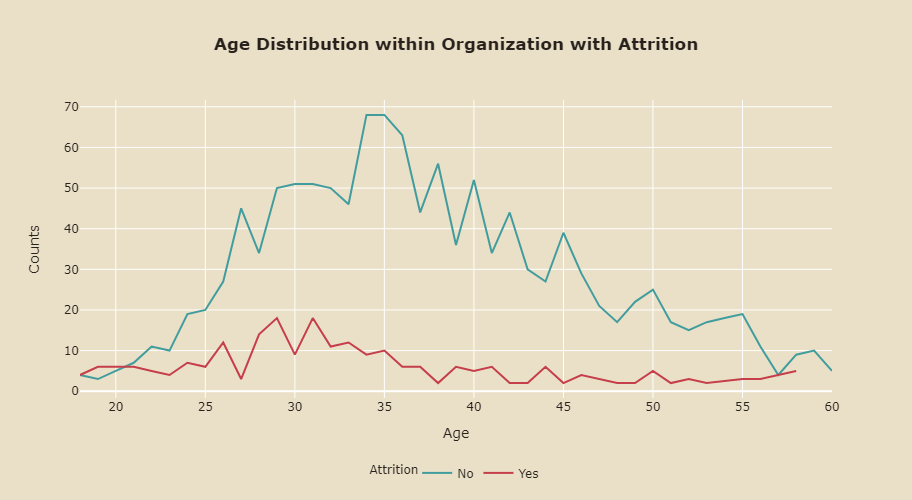

In [14]:
# Grouping by age and attrition status, counting daily rates, and resetting index

age_att = hr.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

line_chart = px.line(age_att, x='Age', y='Counts', color='Attrition',
                     title='<b>Age Distribution within Organization with Attrition</b>', height=500,
                     color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify line colors here

line_chart.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='top center',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

line_chart.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.3, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7',
                  plot_bgcolor='#EADFC7')


line_chart.show()

The age group between 28-32 witnesses the highest attrition rate, indicating a critical phase where individuals may reassess their career paths. This trend gradually declines with advancing age, reflecting a growing emphasis on job stability and long-term commitments.
Conversely, the early career stages, notably between 18-20, often see heightened attrition as individuals explore different opportunities. This pattern reaches a turning point around the age of 21, marking a transition towards more stable employment decisions.

### Exploring the Influence of Income on Employee Attrition Rates

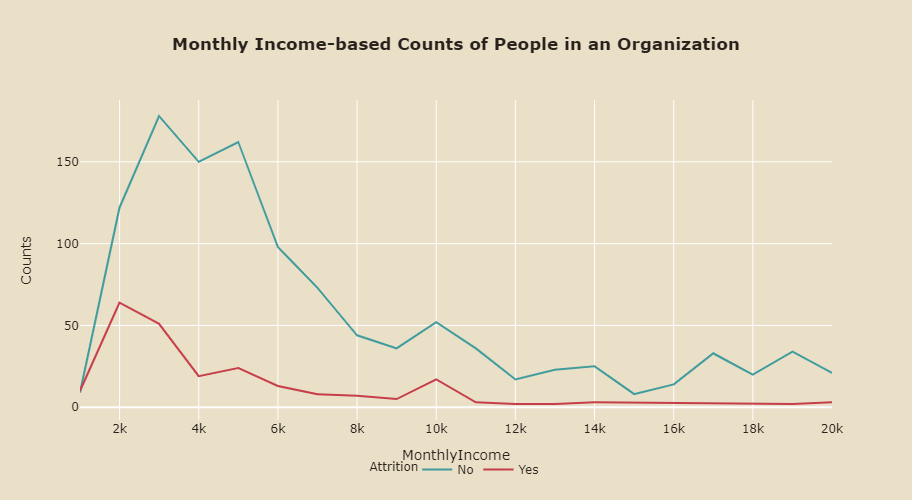

In [15]:
# Grouping by monthly income and attrition status, counting occurrences, and resetting index
rate_att = hr.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Rounding monthly income to the nearest thousand
rate_att['MonthlyIncome'] = round(rate_att['MonthlyIncome'], -3)

# Grouping again by rounded monthly income and attrition status, counting occurrences, and resetting index
rate_att = rate_att.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Creating the line chart
line_chart = px.line(rate_att, x='MonthlyIncome', y='Counts', color='Attrition',
                     title='<b>Monthly Income-based Counts of People in an Organization</b>', height=500,
                     color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify line colors here

line_chart.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='top center',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

line_chart.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')
line_chart.show()

Examining the above chart reveals a significant increase in attrition rates at very low income levels, specifically below 5000 per month. This trend gradually decreases, with a slight increase observed around the 10000 mark, indicative of the middle-class livelihood.
Individuals in this income bracket often aspire to enhance their standards of living, leading them to seek new job opportunities. Conversely, as monthly income reaches a more comfortable level, the likelihood of employee turnover diminishes, as evidenced by the stable, flat line.

### Impact of Job Satisfaction on Employee Attrition with Average Monthly Salary

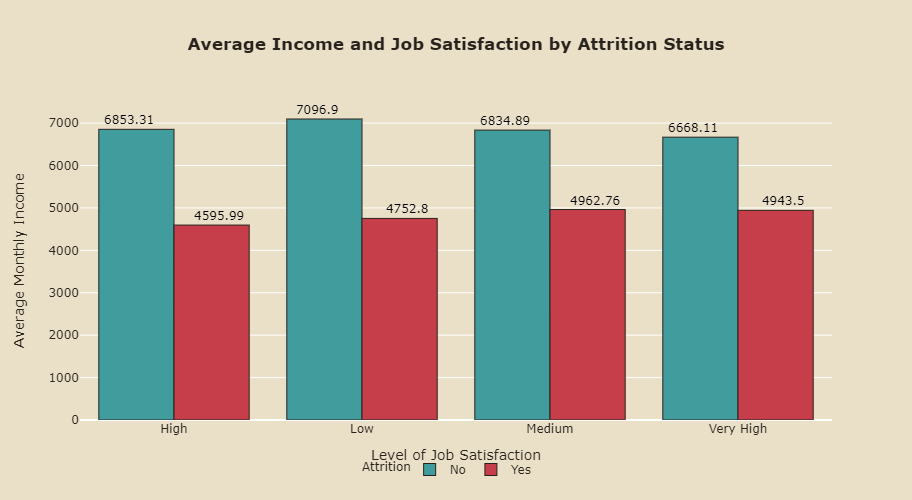

In [16]:
# Map job satisfaction level to corresponding text labels
job_satisfaction_labels = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

# Convert 'JobSatisfaction' column to text labels
hr['JobSatisfaction'] = hr['JobSatisfaction'].map(job_satisfaction_labels)

# Group data by 'JobSatisfaction' and 'Attrition', calculate average monthly income
avg_inc = hr.groupby(['JobSatisfaction', 'Attrition'])['MonthlyIncome'].mean().reset_index()

# Create Plotly plot
fig = px.bar(avg_inc, x='JobSatisfaction', y='MonthlyIncome', color='Attrition', barmode='group',
             title='<b>Average Income and Job Satisfaction by Attrition Status</b>',
             labels={'JobSatisfaction': 'Level of Job Satisfaction', 'MonthlyIncome': 'Average Monthly Income'},
             category_orders={'JobSatisfaction': sorted(hr['JobSatisfaction'].unique())}, height=500,
            color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify custom colors

# Add data labels with adjusted positions
for trace in fig.data:
    if trace.name == 'Yes':
        for i, label in enumerate(trace.y):
            fig.add_annotation(x=trace.x[i], y=label, text=str(round(label, 2)),
                               showarrow=False, font=dict(color='black', size=12), yshift=10, xshift=45)
    else:
        for i, label in enumerate(trace.y):
            fig.add_annotation(x=trace.x[i], y=label, text=str(round(label, 2)),
                               showarrow=False, font=dict(color='black', size=12), yshift=10, xshift=-45)

# Add percentage labels to the bars
fig.update_traces(textposition='outside',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')

fig.show()

In analyzing attrition trends, it's evident that individuals with lower levels of job satisfaction are more inclined to leave their positions. This trend is particularly noticeable among those earning an average monthly salary of $4596, indicating that dissatisfaction may drive employee turnover.

Conversely, individuals with higher satisfaction levels, especially those earning an average monthly salary of $6853, are more likely to remain with the company. This suggests that job satisfaction plays a crucial role in employee retention, with higher satisfaction levels mitigating the risk of attrition.

Overall, this insight underscores the importance of fostering a positive work environment and addressing factors contributing to job dissatisfaction to reduce attrition rates and retain valuable talent within the organization.

### Analysis of Attrition Rates Across Departments

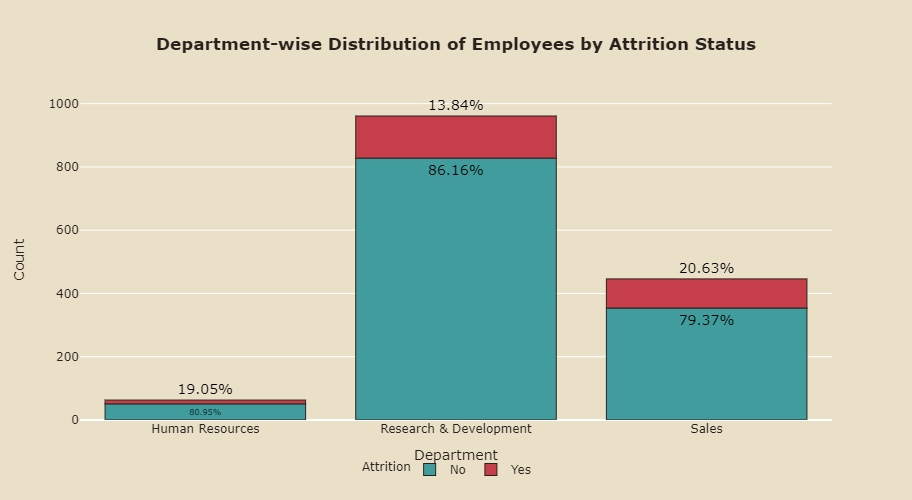

In [17]:
# Group data by Department and Attrition, count occurrences, and reset index
dept_att = hr.groupby(['Department', 'Attrition']).size().reset_index(name='Counts')

# Calculate total counts per department
dept_total_counts = dept_att.groupby('Department')['Counts'].transform('sum')

# Calculate percentage within each department
dept_att['Percentage'] = (dept_att['Counts'] / dept_total_counts) * 100

# Create a bar plot
fig = px.bar(dept_att, x='Department', y='Counts', color='Attrition',
             title='<b>Department-wise Distribution of Employees by Attrition Status</b>',
             text='Percentage', # Use 'Percentage' column as text
             labels={'Counts': 'Count', 'Percentage': 'Percentage'}, height = 500, 
            color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify custom colors

# Add percentage labels to the bars
fig.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='outside',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')

fig.show()

This dataset includes three primary departments. Among them, the Sales department exhibits the highest attrition rate at 20.63%, trailed by the Human Resources Department at 19.05%. Conversely, the Research and Development department demonstrates the lowest attrition rate, indicating stability and contentment within the department, as depicted in the chart (13.84%).

### Attrition Rates Across Job Roles: A Hierarchy of Stability

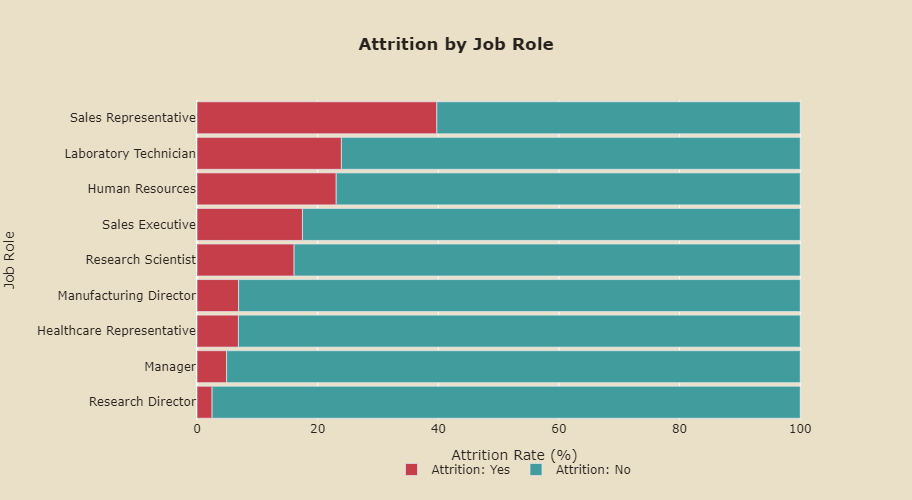

In [18]:
# Group data by JobRole and Attrition, calculate count and percentage
attr_job = hr.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
attr_job['Total'] = attr_job.sum(axis=1)
attr_job['Attrition_Rate'] = attr_job['Yes'] / attr_job['Total'] * 100

attr_job = attr_job.sort_values('Attrition_Rate')

fig = go.Figure()

# Add 'Yes' Attrition bars
fig.add_trace(go.Bar(y=attr_job.index,
                     x=attr_job['Attrition_Rate'],
                     name='Attrition: Yes',
                     orientation='h',
                     marker_color='#C53E4A'))

# Add 'No' Attrition bars
fig.add_trace(go.Bar(y=attr_job.index,
                     x=100 - attr_job['Attrition_Rate'],
                     name='Attrition: No',
                     orientation='h',
                     marker_color='#419D9D'))

fig.update_layout(
    title='<b>Attrition by Job Role</b>',
    title_x=0.5,
    xaxis_title='Attrition Rate (%)',
    yaxis_title='Job Role',
    barmode='relative',
    bargap=0.1,
    legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center',  x=0.50),
    height=500,
    font_color='#28221D', 
    paper_bgcolor='#EADFC7',
    plot_bgcolor='#EADFC7'
)

fig.show()

The analysis suggests that higher-level job roles within the organization demonstrate lower attrition rates compared to lower-level roles. Positions such as manufacturing directors, healthcare representatives, managers, and research directors exhibit notably lower attrition rates, indicating that individuals in these roles are less likely to leave the company.

Conversely, roles at lower organizational levels, such as sales representatives, laboratory technicians, and human resources personnel, demonstrate higher attrition rates. This insight implies that individuals in higher-level job roles tend to stay with the company more consistently, contributing to a more stable workforce.

### The Impact of Salary Hikes on Employee Retention

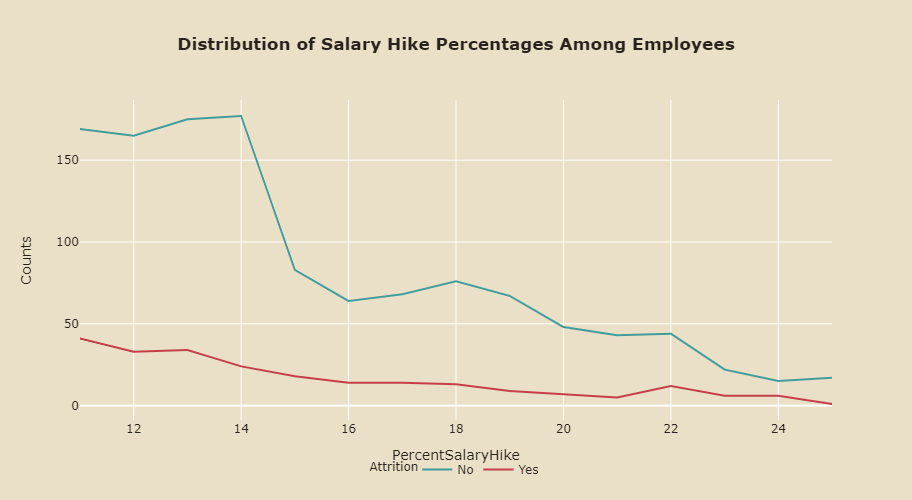

In [19]:
hike_att = hr.groupby(['PercentSalaryHike', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

line_plot = px.line(hike_att, x='PercentSalaryHike', y='Counts', color='Attrition',
                    title='<b>Distribution of Salary Hike Percentages Among Employees</b>', height=500,
                    color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})

line_plot.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='top center',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

line_plot.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')

line_plot.show()

Enhanced salary increments serve as a significant incentive for employees, encouraging improved performance and fostering retention within the organization. Consequently, the likelihood of an employee departing from an organization offering lower salary hikes is considerably higher compared to one providing substantial salary increments.

### Examining Work Experience Diversity Among Employees

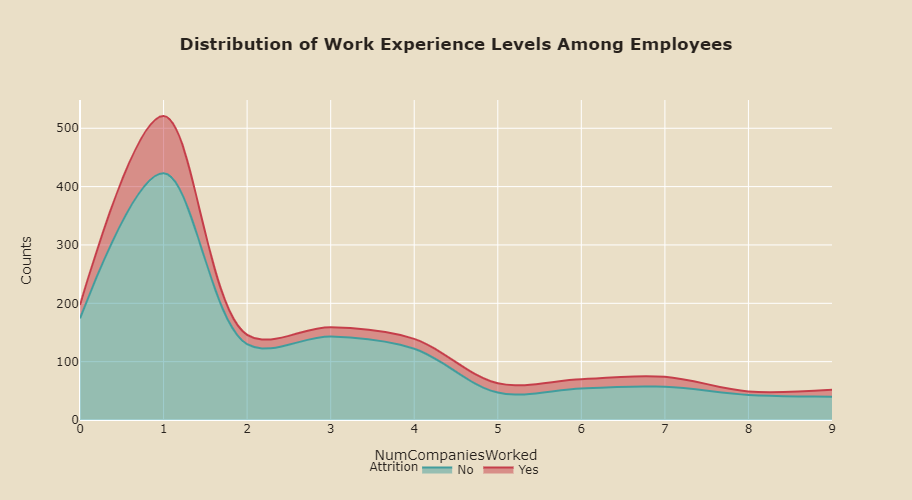

In [20]:
exp_att = hr.groupby(['NumCompaniesWorked', 'Attrition']).size().reset_index(name='Counts')

area_plot = px.area(exp_att, x='NumCompaniesWorked', y='Counts', color='Attrition',
                    title='<b>Distribution of Work Experience Levels Among Employees</b>', line_shape='spline', height=500,
                    color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})

area_plot.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='top center',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

area_plot.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.4, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')

area_plot.update_layout(title_x=0.5, legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5))

area_plot.show()

The chart illustrates a notable trend: individuals who begin their careers with the company or transition to it early on are more likely to seek opportunities elsewhere. Conversely, those with extensive experience across multiple companies tend to exhibit greater loyalty to their current employer.

### Effect of Salary Hikes on Employee Retention and Motivation

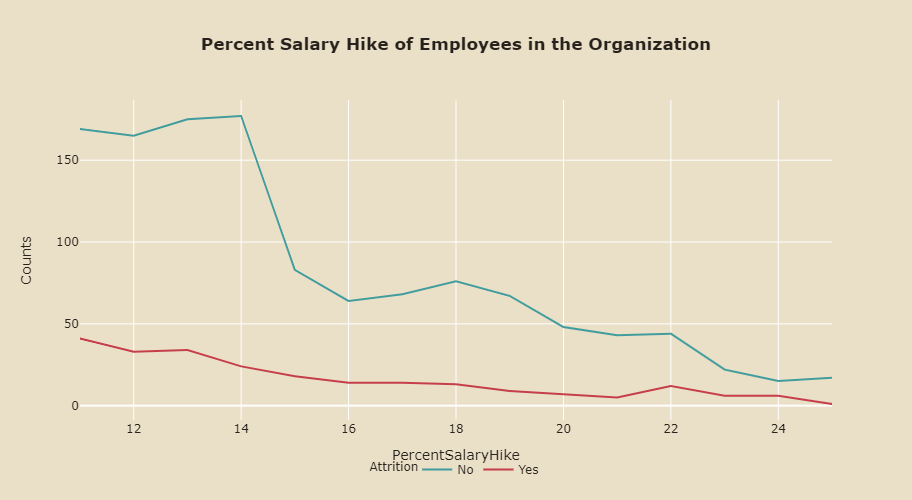

In [21]:
promotion_att = hr.groupby(['PercentSalaryHike', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

fig = px.line(promotion_att, x='PercentSalaryHike', y='Counts', color='Attrition', 
              title='<b>Percent Salary Hike of Employees in the Organization</b>', height=500, 
              color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify line colors here

fig.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='top center',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')

fig.show()

Increased salary raises inspire individuals to perform more effectively and remain committed to the organization. Consequently, we observe that the likelihood of an employee departing from a company with lower salary increments is significantly higher compared to one that offers substantial raises.

### Attrition Rates Across Education Levels

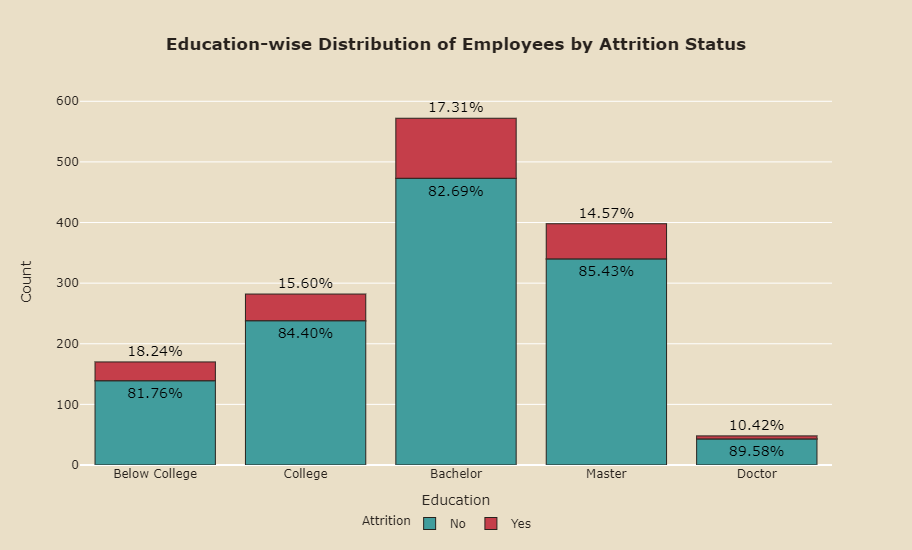

In [22]:
import plotly.express as px

education_labels = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

# Group data by Education and Attrition, count occurrences, and reset index
dept_att = hr.groupby(['Education', 'Attrition']).size().reset_index(name='Counts')

# Calculate total counts per Education
dept_total_counts = dept_att.groupby('Education')['Counts'].transform('sum')

# Calculate percentage within each Education
dept_att['Percentage'] = (dept_att['Counts'] / dept_total_counts) * 100

# Replace education codes with labels
dept_att['Education'] = dept_att['Education'].map(education_labels)

# Create a bar plot
fig = px.bar(dept_att, x='Education', y='Counts', color='Attrition',
             title='<b>Education-wise Distribution of Employees by Attrition Status</b>',
             text='Percentage', # Use 'Percentage' column as text
             labels={'Counts': 'Count', 'Percentage': 'Percentage'}, height=550, # Update axis labels
             color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify custom colors

# Add percentage labels to the bars
fig.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='outside',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')

fig.show()

The graph indicates that individuals with education levels below college have the highest attrition rate at 18.24%. This may be because they face limited opportunities for career advancement or feel dissatisfied with roles that don't fully utilize their educational background.

Following closely, employees with bachelor's degrees experience a 17.31% attrition rate. This could be due to aspirations for career growth, seeking better compensation, or exploring opportunities in other organizations.

Similarly, employees with college diplomas face a 15.60% attrition rate. Factors such as job fit, workplace culture, or external market conditions may contribute to their decision to leave.

In contrast, individuals with master's degrees demonstrate a lower attrition rate of 14.57%. Their specialized skills and advanced qualifications make them valuable to their employers, reducing their inclination to seek opportunities elsewhere.

Lastly, employees with doctorate degrees exhibit the lowest attrition rate at 10.42%. Their extensive expertise and deep knowledge in their field contribute to high job satisfaction and a strong commitment to their work. Additionally, the limited availability of positions matching their expertise in the job market further reduces attrition among this group.

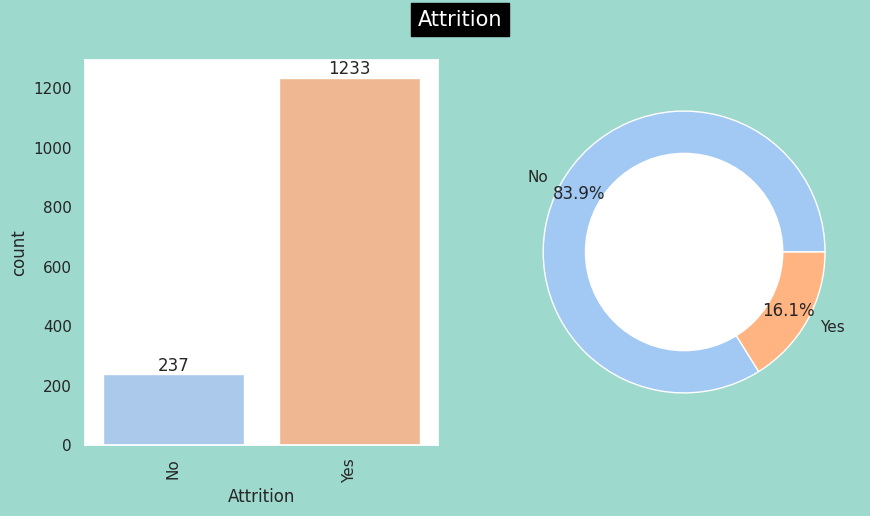

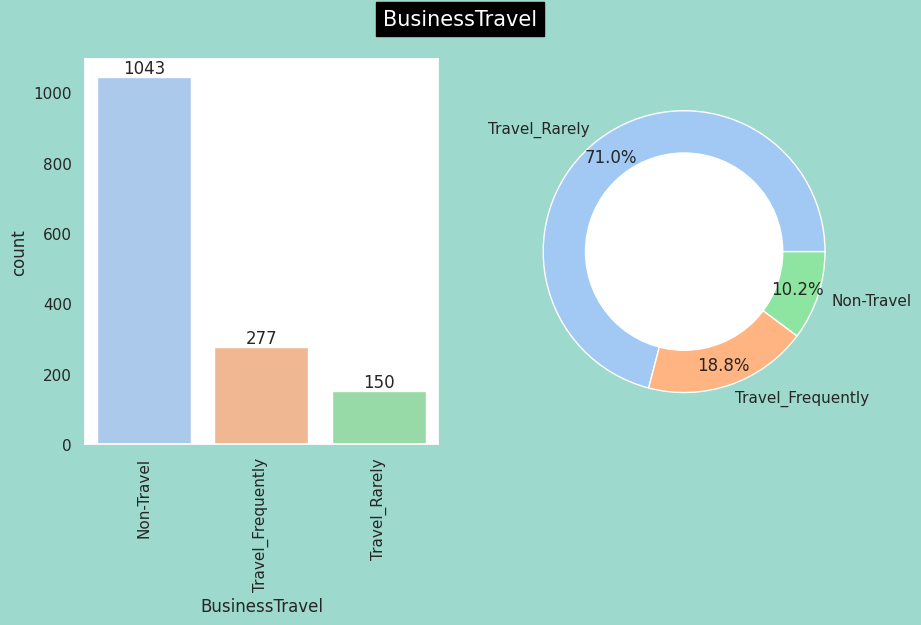

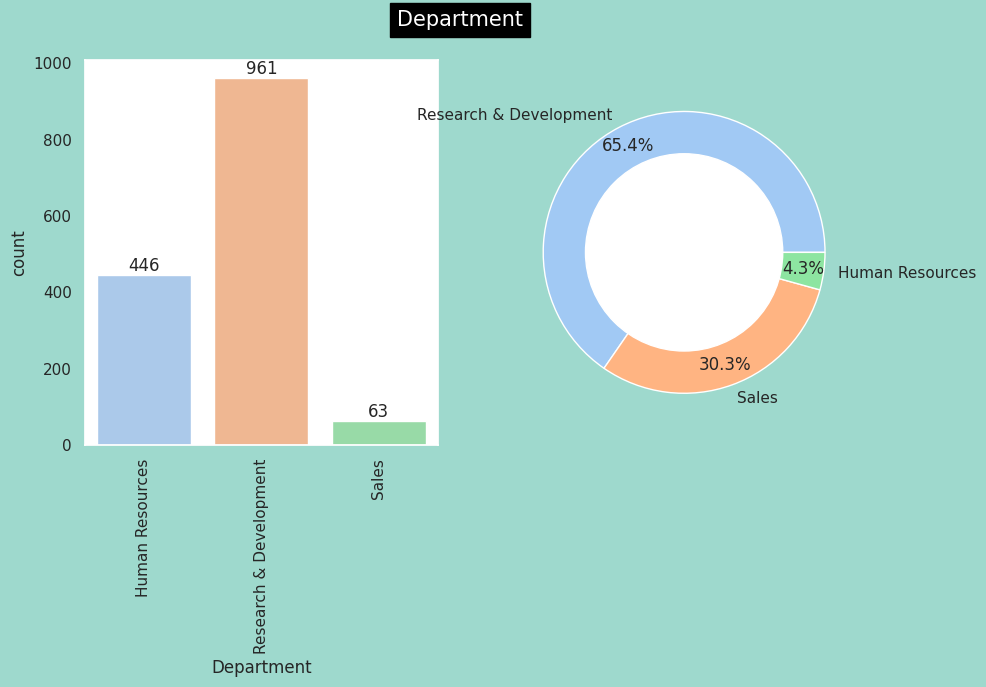

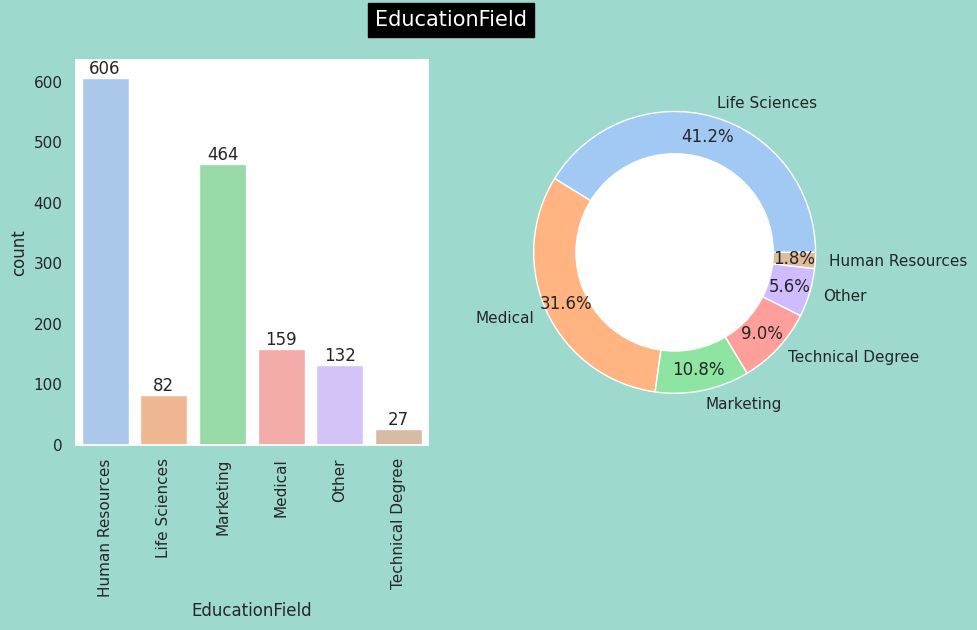

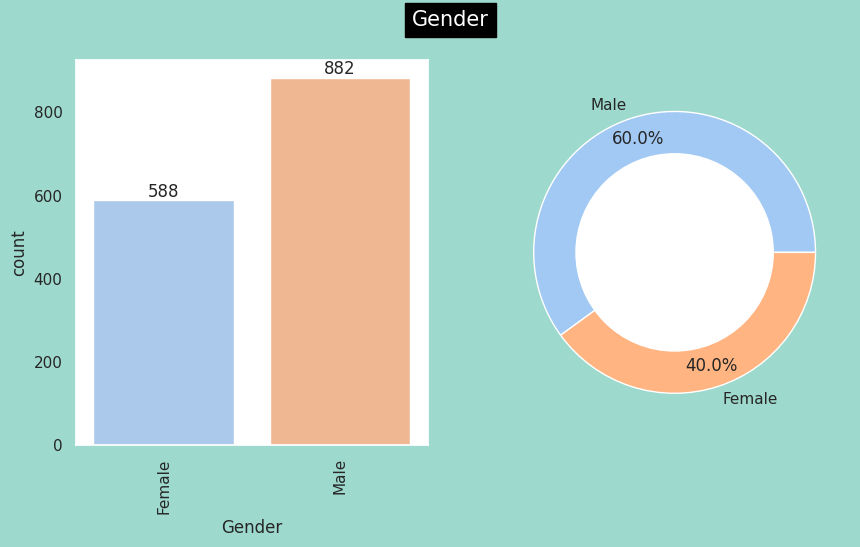

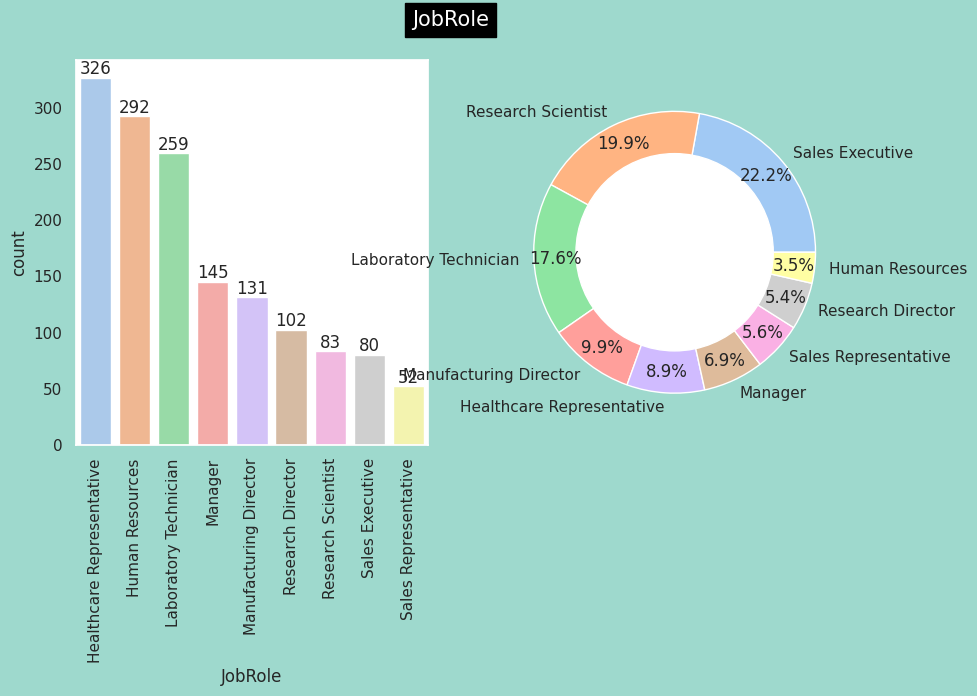

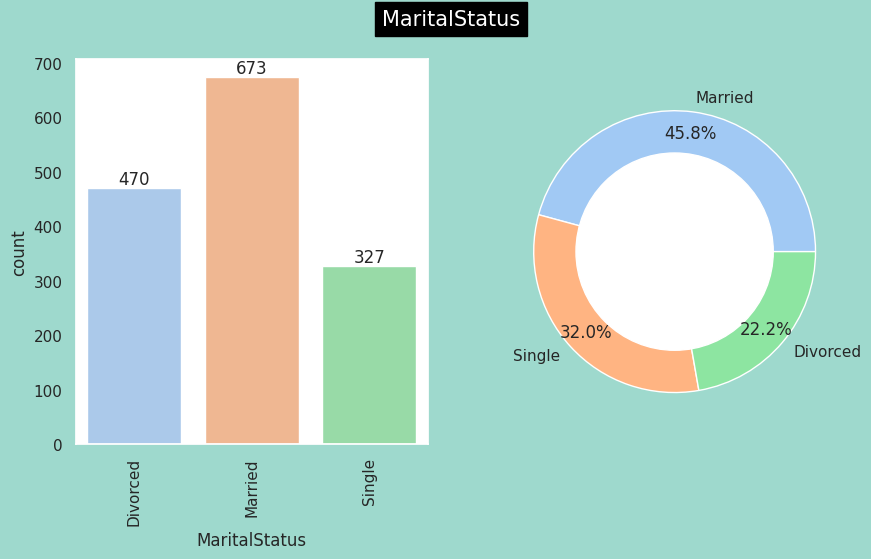

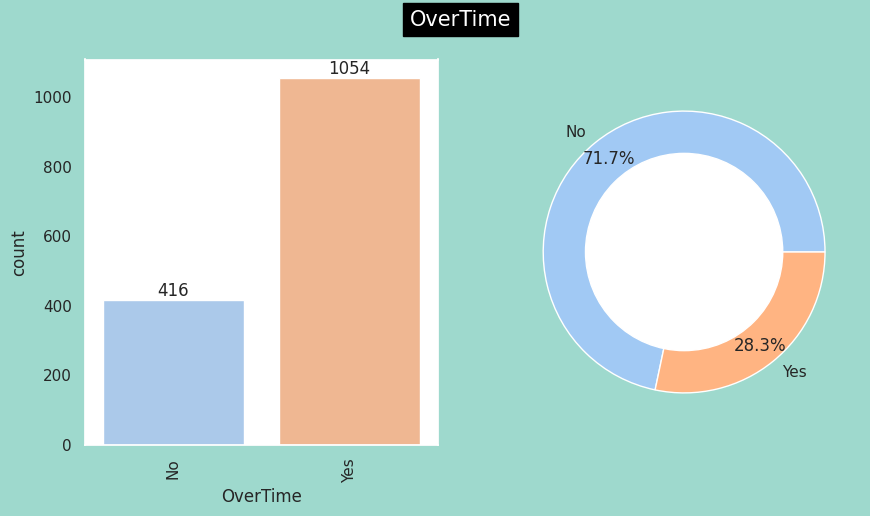

In [23]:
# univariate analysis of categorical data:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"#9ed9cd"})
sns.set_palette("pastel")
for i, col in enumerate(cat):

    fig, axes = plt.subplots(1,2,figsize=(10,5))

    # count of col (countplot)
    
    ax=sns.countplot(data=df, x=col, ax=axes[0])
    activities = [var for var in df[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities,rotation=90)
    for container in axes[0].containers:
        axes[0].bar_label(container)
        
    #count of col (pie chart)
    
    index = df[col].value_counts().index
    size = df[col].value_counts().values
    explode = (0.05, 0.05)

    axes[1].pie(size, labels=index,autopct='%1.1f%%', pctdistance=0.85)

    # Inner circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.suptitle(col,backgroundcolor='black',color='white',fontsize=15)

    plt.show()

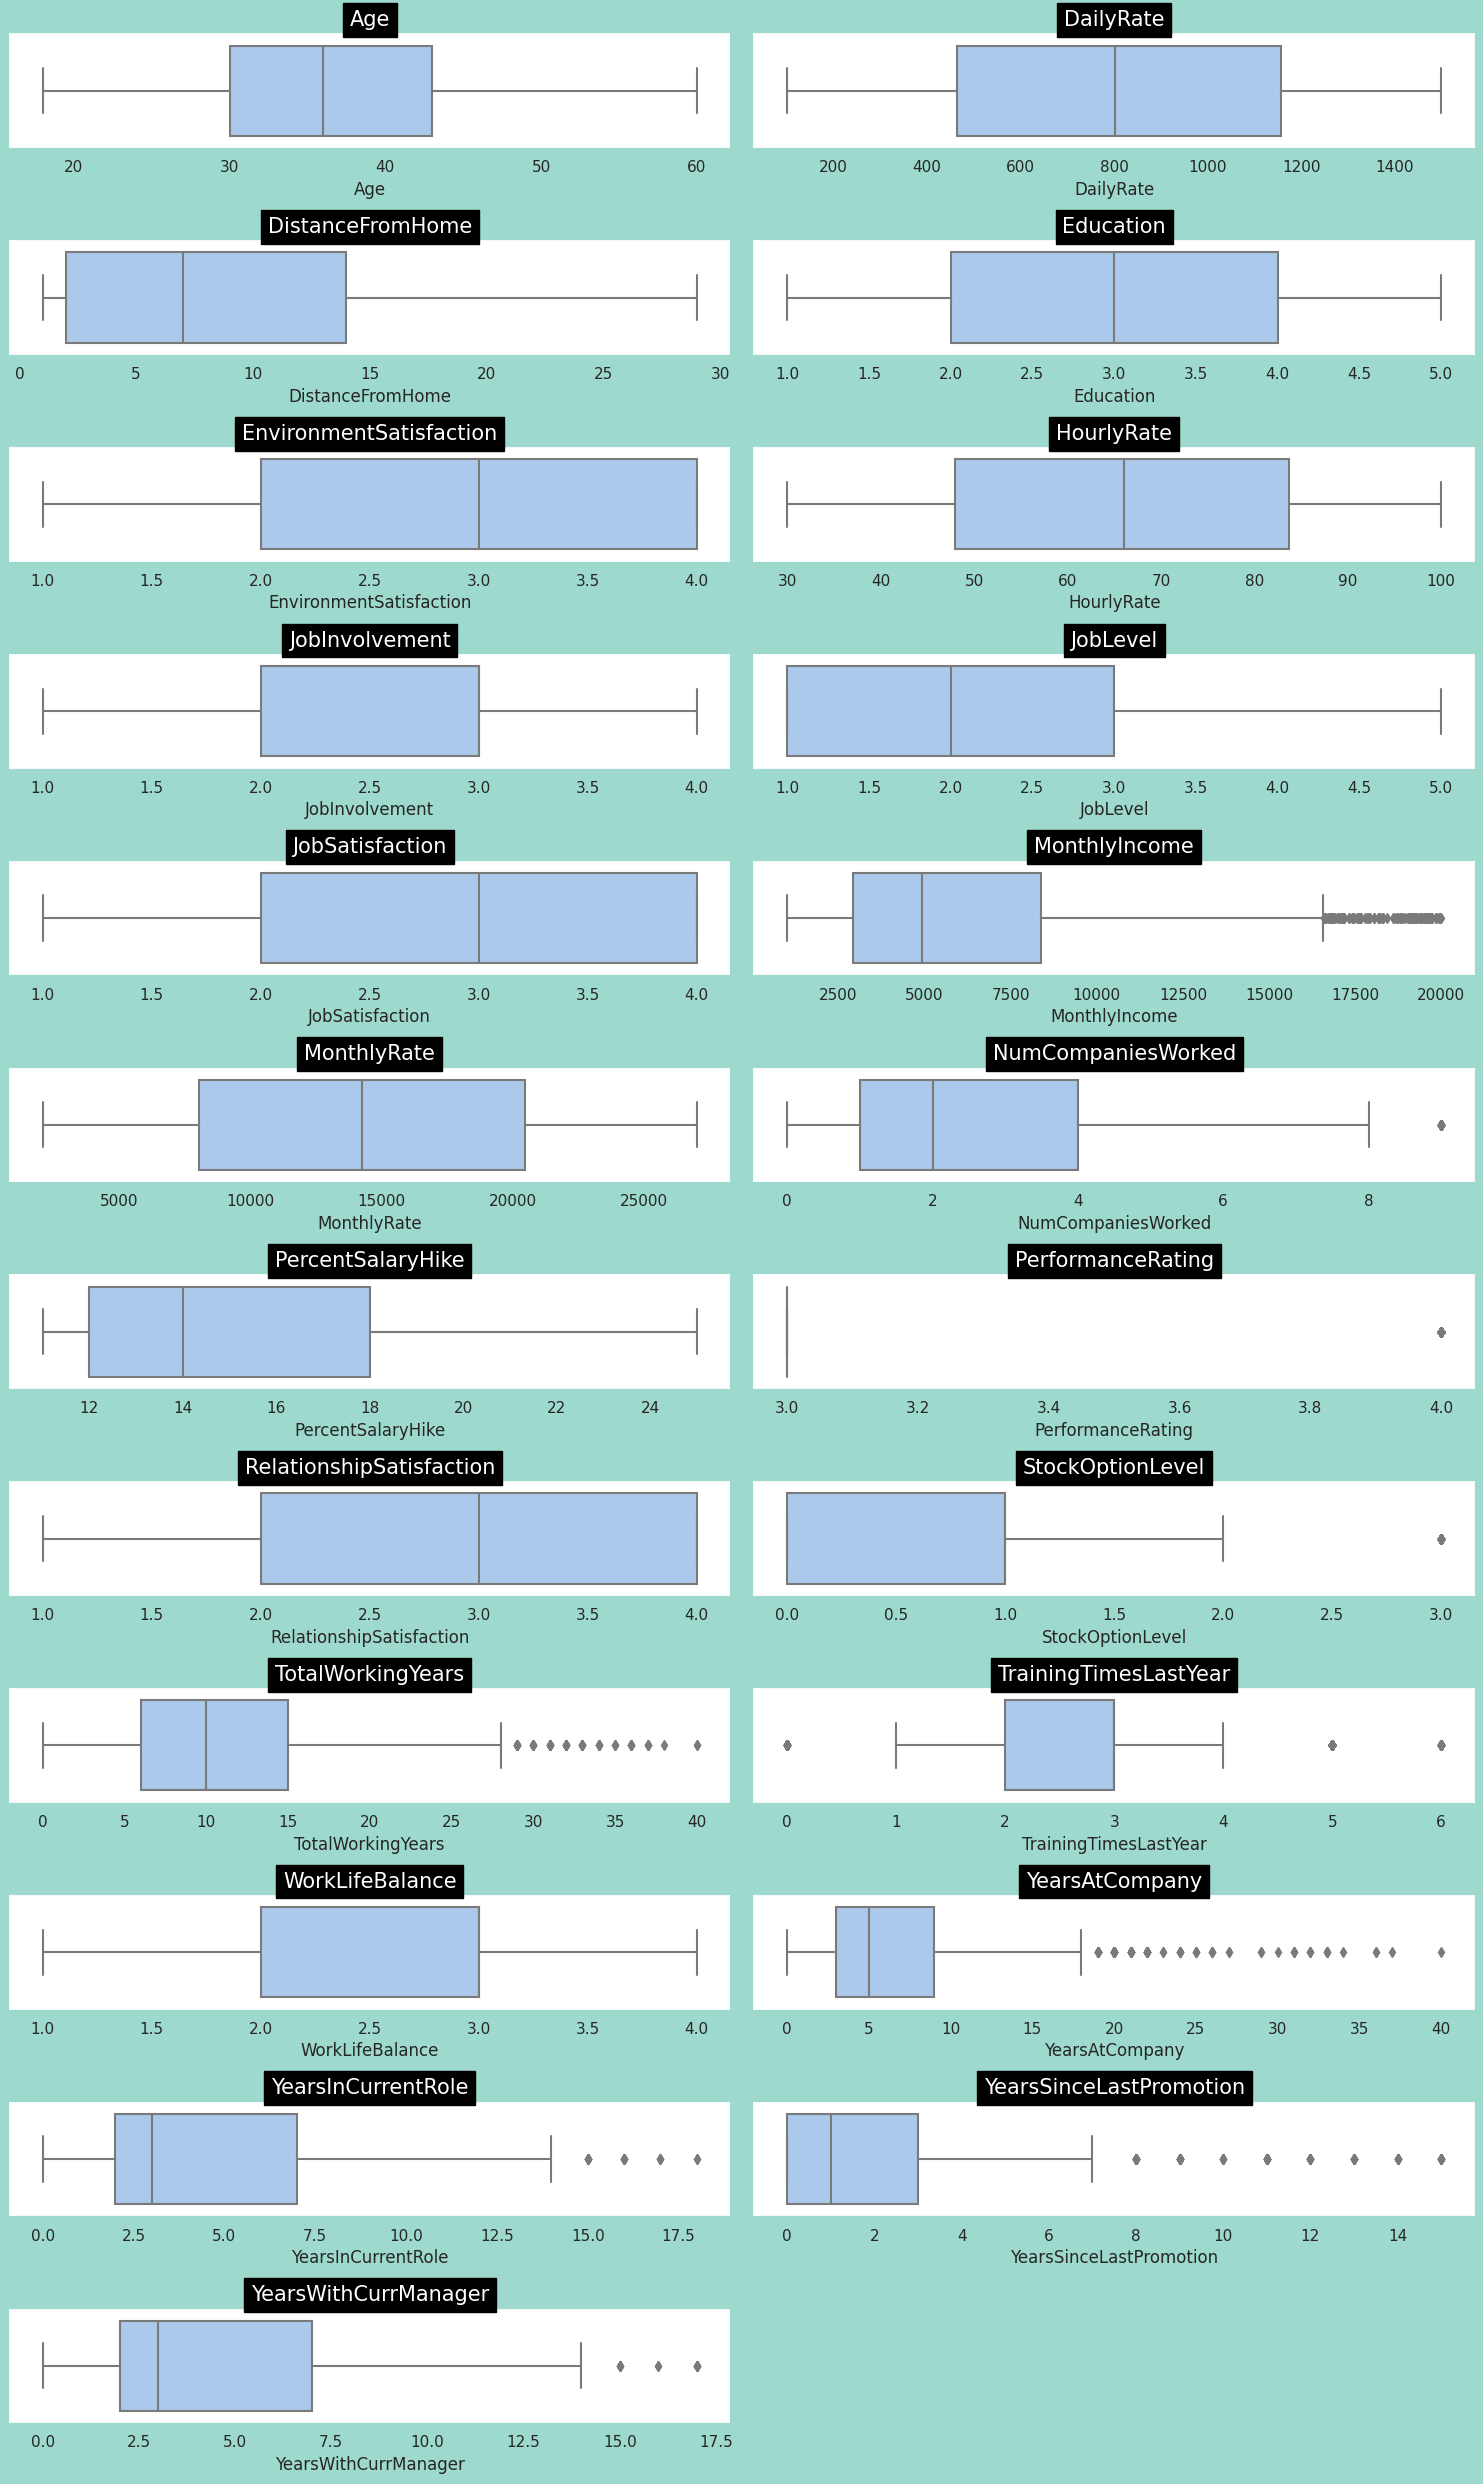

In [ ]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()                     
plt.show()

<Figure size 500x1000 with 0 Axes>

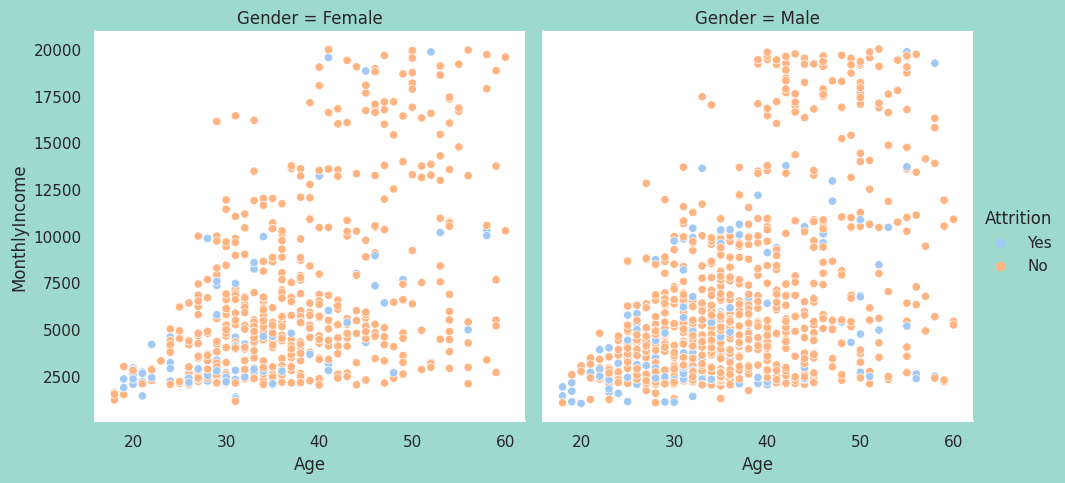

In [25]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

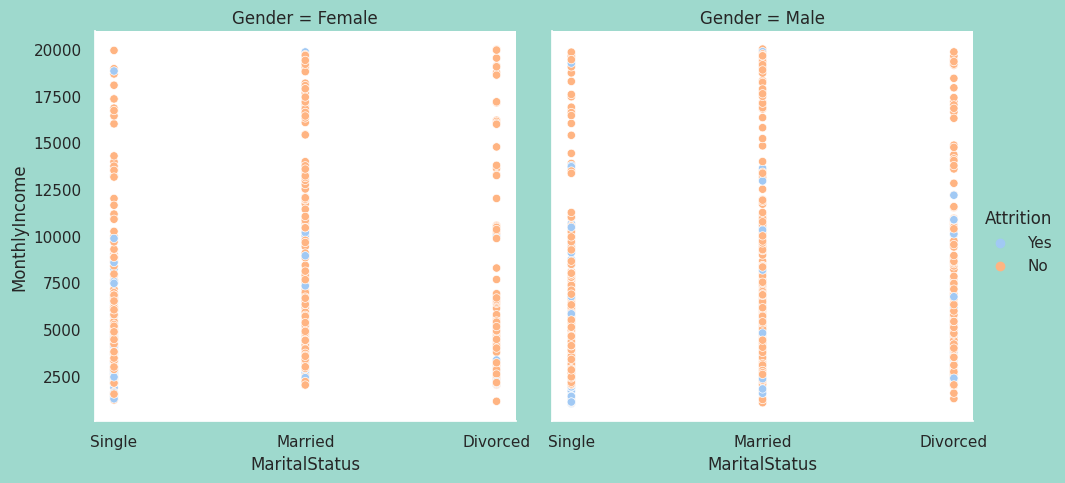

In [26]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="MaritalStatus", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

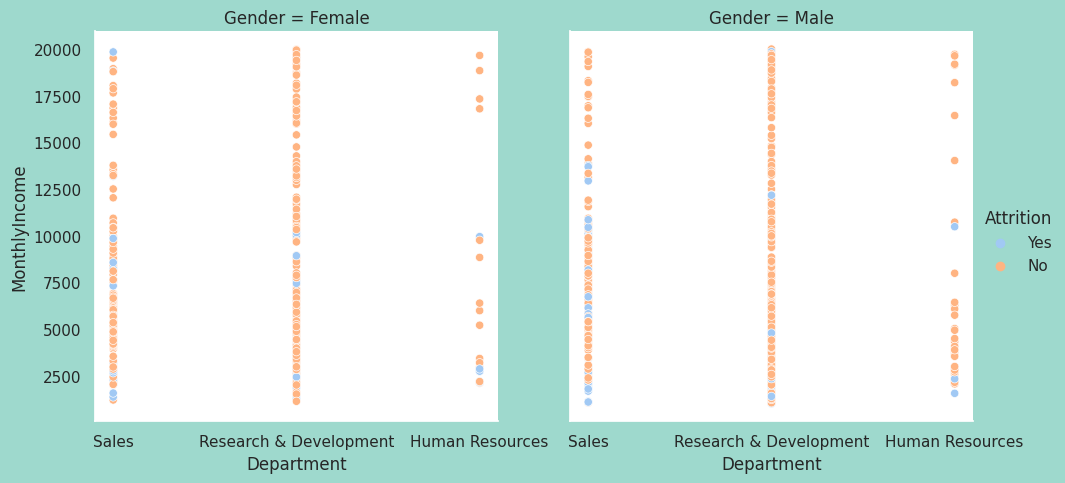

In [27]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Department", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

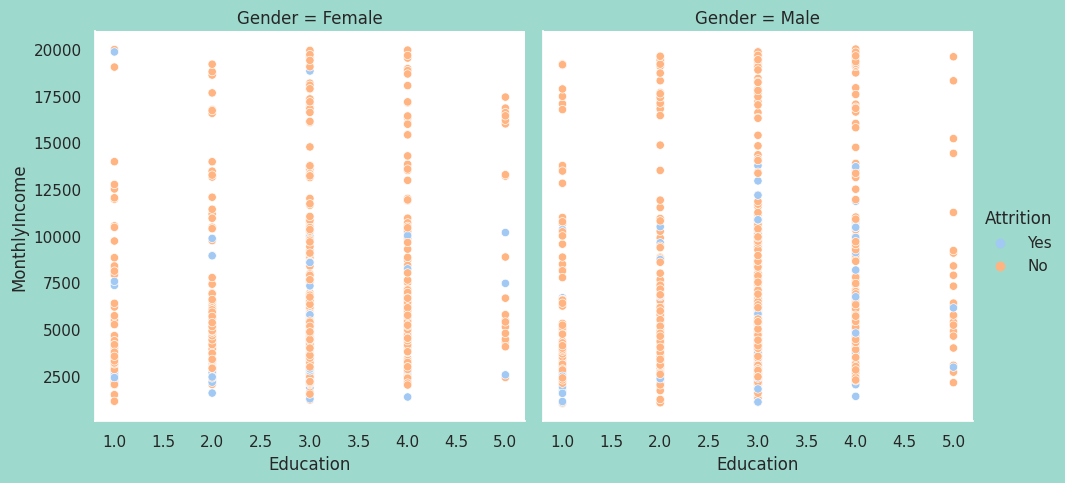

In [28]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Education", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

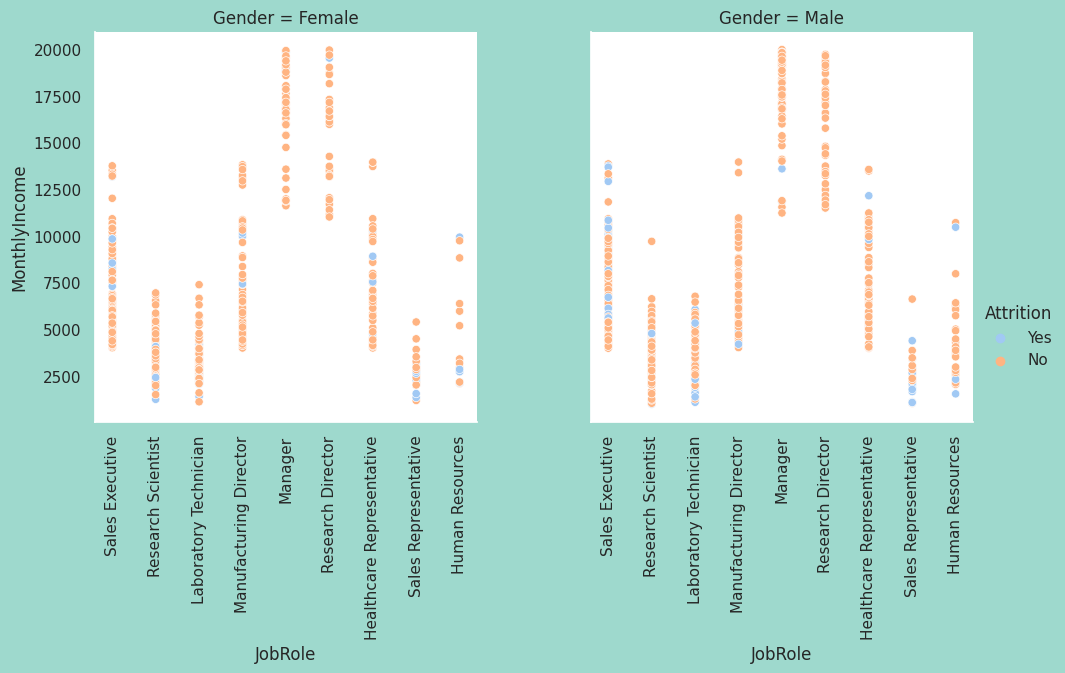

In [29]:
plt.figure(figsize=(5,10))
ax=sns.relplot(data=df, y="MonthlyIncome", x="JobRole", hue="Attrition",col='Gender')
rotation = 90 
for i, ax in enumerate(ax.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
#plt.xticks(rotation=90)
plt.show()

<Figure size 500x1000 with 0 Axes>

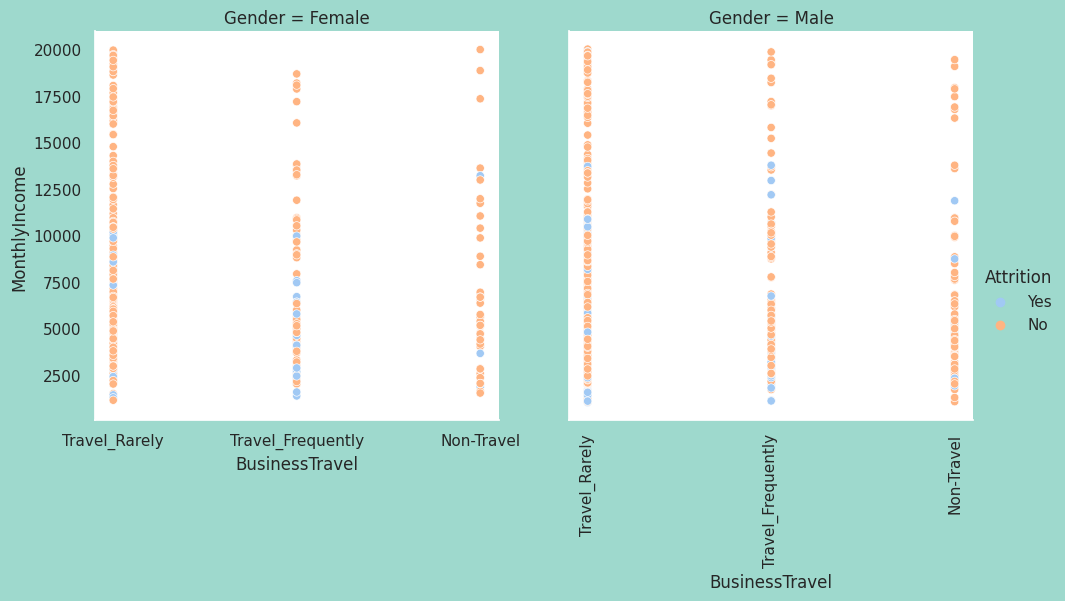

In [30]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="BusinessTravel", hue="Attrition",col='Gender')
plt.xticks(rotation=90)
plt.show()

From the graphs, we can analyse that
* Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.
* As income increases, attrition decreases.
* Attrition is much, much less in divorced women.
* Attrition is higher for employees who usually travel than others, and this rate is higher for women than for men.
* Attrition is the highest for those in level 1 jobs.
* Women with the job position of manager, research director and technician laboratory have almost no attrition.
* Men with the position of sales expert have a lot of attrition.

# Data Preprocessing

In [31]:
df_copy = df.copy()

In [32]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy['Attrition'] = le.fit_transform(df['Attrition'])
df_copy['OverTime'] = le.fit_transform(df['OverTime'])
df_copy['Gender'] = le.fit_transform(df['Gender'])

In [33]:
#convert category attributes with more than 2 distinct values to numeric using one-hot encoding
df_copy = pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'])

<Axes: >

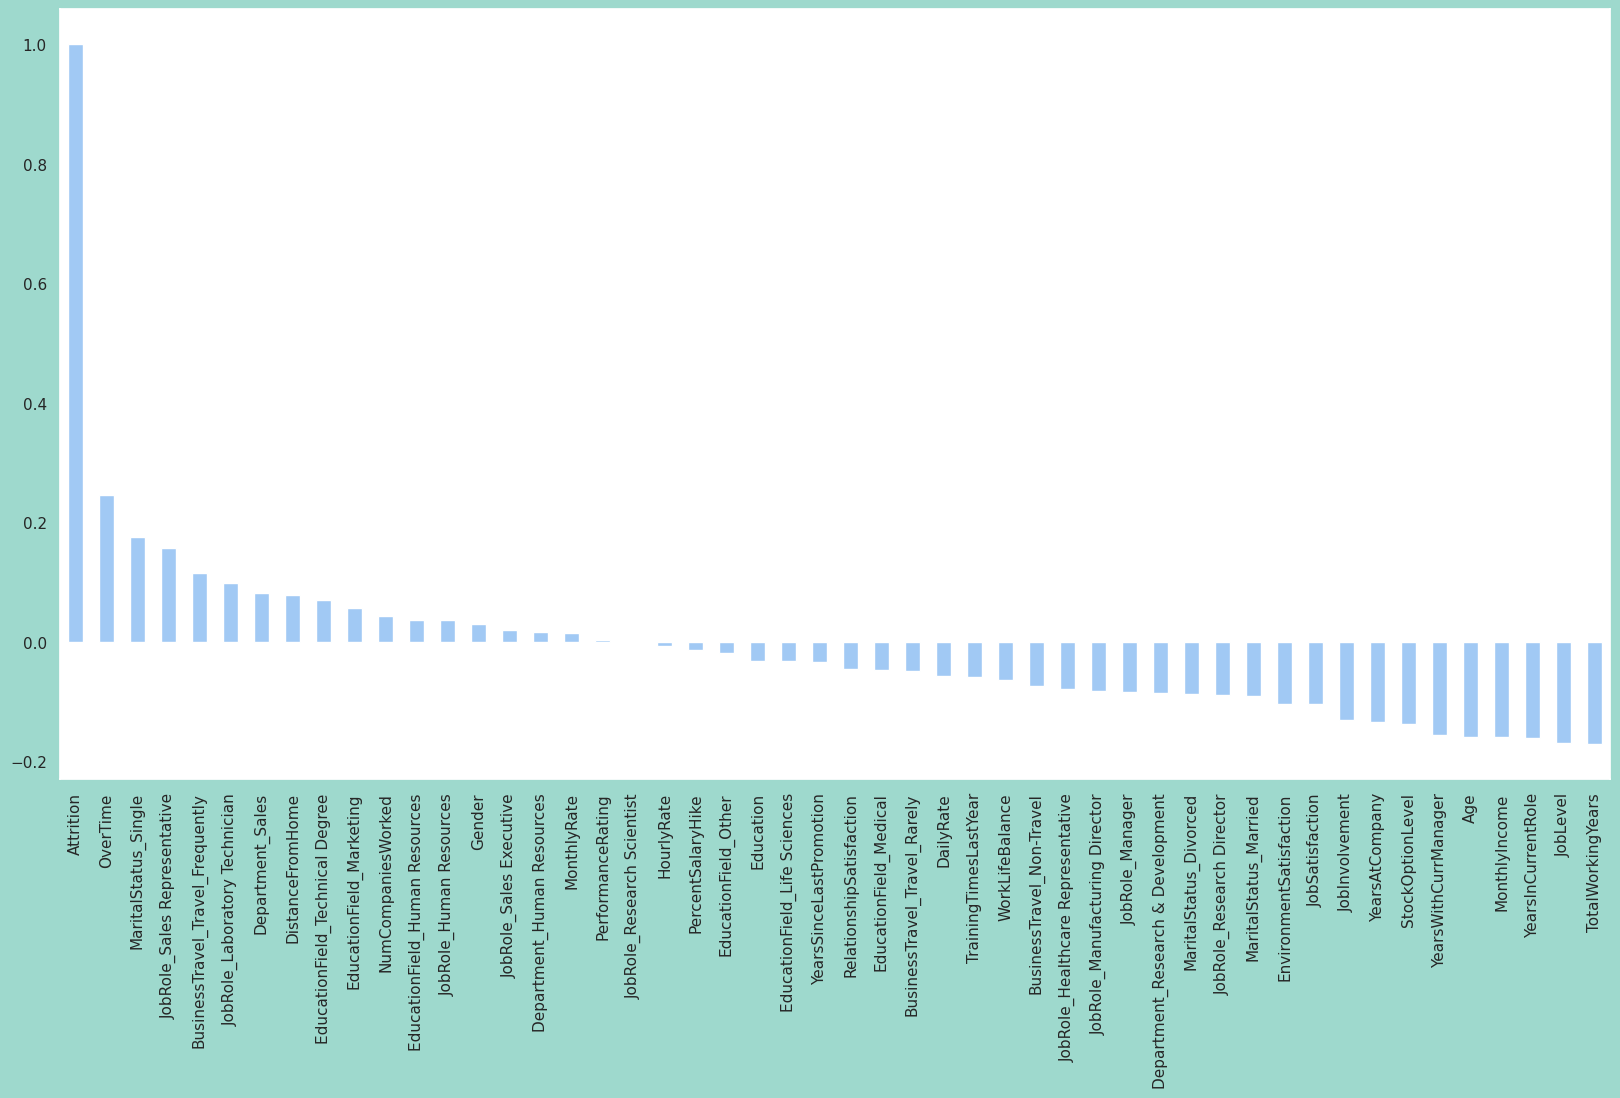

In [34]:
plt.figure(figsize=(20,10))
correlations=df_copy.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar')

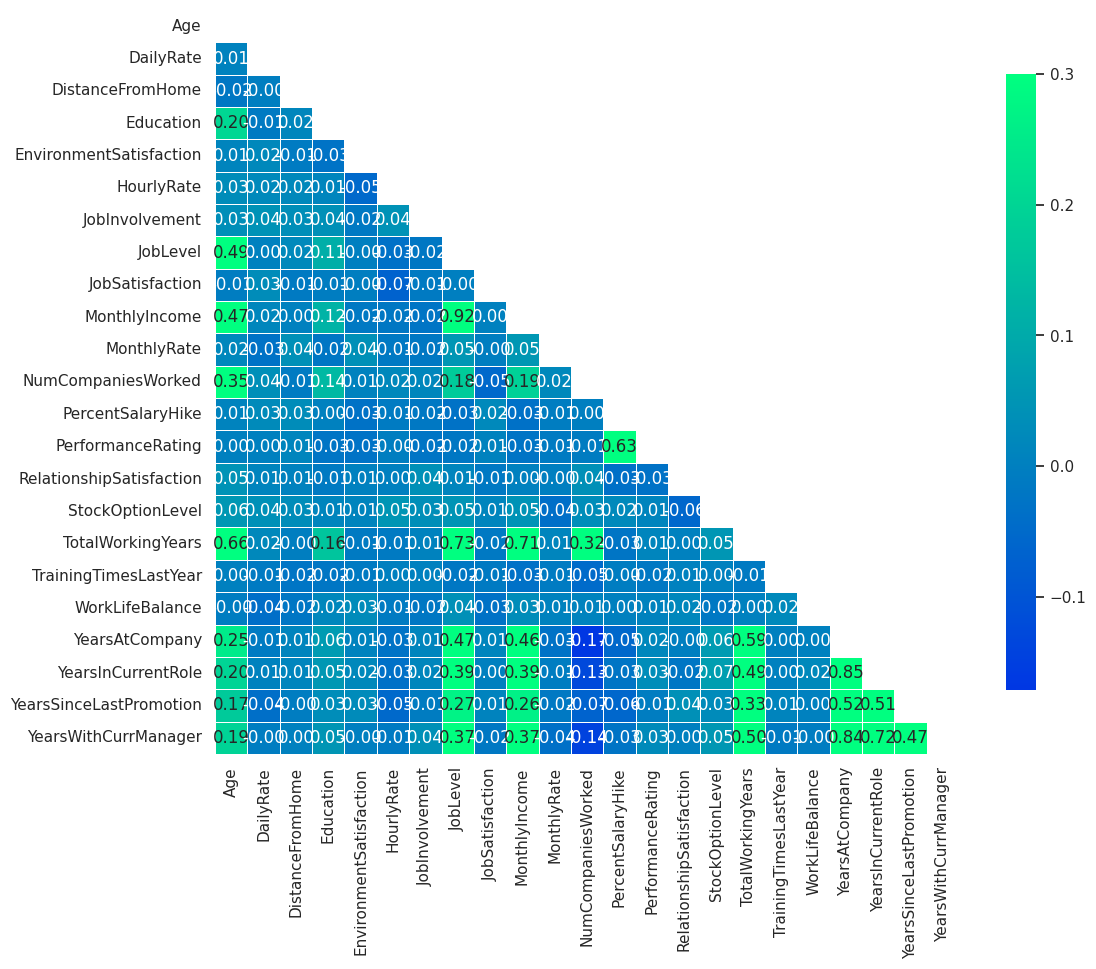

In [35]:
df2 = df.select_dtypes('int64')
df2_copy = df2.copy()


corr = df2_copy.corr(method = "spearman")
sns.set(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10), dpi = 100)
sns.heatmap(corr, mask = mask, cmap= "winter", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot = True, fmt = ".2f")
plt.show()

There are high correlation between some features:

* Monthly Income & Job Level
* year in current role, year at company & year with current manager

# Model Development

In [36]:
DF = df.copy()

In [37]:
# Performing ordinal encoding to categorical variables

DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Rarely',2)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Frequently',3)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Non-Travel',4)

DF['Attrition'] = DF['Attrition'].replace('Yes',2)
DF['Attrition'] = DF['Attrition'].replace('No',3)

DF['OverTime'] = DF['OverTime'].replace('Yes',2)
DF['OverTime'] = DF['OverTime'].replace('No',3)

DF['Gender'] = DF['Gender'].replace('Male',2)
DF['Gender'] = DF['Gender'].replace('Female',3)

DF['MaritalStatus'] = DF['MaritalStatus'].replace('Single',2)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Married',3)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Divorced',4)

DF['Department'] = DF['Department'].replace('Sales',2)
DF['Department'] = DF['Department'].replace('Human Resources',3)
DF['Department'] = DF['Department'].replace('Research & Development',4)

DF['EducationField'] = DF['EducationField'].replace('Life Sciences',2)
DF['EducationField'] = DF['EducationField'].replace('Medical',3)
DF['EducationField'] = DF['EducationField'].replace('Marketing',4)
DF['EducationField'] = DF['EducationField'].replace('Technical Degree',2)
DF['EducationField'] = DF['EducationField'].replace('Human Resources',3)
DF['EducationField'] = DF['EducationField'].replace('Other',4)

DF['JobRole'] = DF['JobRole'].replace('Sales Executive',2)
DF['JobRole'] = DF['JobRole'].replace('Manufacturing Director',3)
DF['JobRole'] = DF['JobRole'].replace('Healthcare Representative',4)
DF['JobRole'] = DF['JobRole'].replace('Manager',2)
DF['JobRole'] = DF['JobRole'].replace('Research Director',3)
DF['JobRole'] = DF['JobRole'].replace('Laboratory Technician',4)
DF['JobRole'] = DF['JobRole'].replace('Sales Representative',2)
DF['JobRole'] = DF['JobRole'].replace('Research Scientist',3)
DF['JobRole'] = DF['JobRole'].replace('Human Resources',4)

In [38]:
DF = DF.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)

In [39]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
DF1 = DF.drop(columns=['Attrition'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)

In [40]:
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

In [41]:
# Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In the given problem, we found out that the number of females and males are greatly imbalanced. This will lead to a major problem while building the model. To overcome this, we use oversampling. Here, we will be using SMOTE, a popular technique for oversampling.

In [42]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train,y_train)

In [43]:
# Checking shape of original data and data after SMOTE
print(X_train.shape)
print(smote_train.shape)

(1176, 26)
(1976, 26)


In [44]:
# Helper function to plot confusion matrix and display accuracy
def plot(predictions):
    fig, ax = plt.subplots(figsize=(10,5))
    cm = metrics.confusion_matrix(y_test,predictions)
    sns.heatmap(metrics.confusion_matrix(y_test,predictions),annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.xlabel('y prediction')
    plt.ylabel('y actual')
    plt.show()

    print(metrics.classification_report(y_test, predictions))

## 1. Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(smote_train, smote_target)
y_pred_lg = log_reg.predict(X_test)

log_reg_acc = metrics.accuracy_score(y_test, y_pred_lg)
print ('accuracy',log_reg_acc)

accuracy 0.7687074829931972


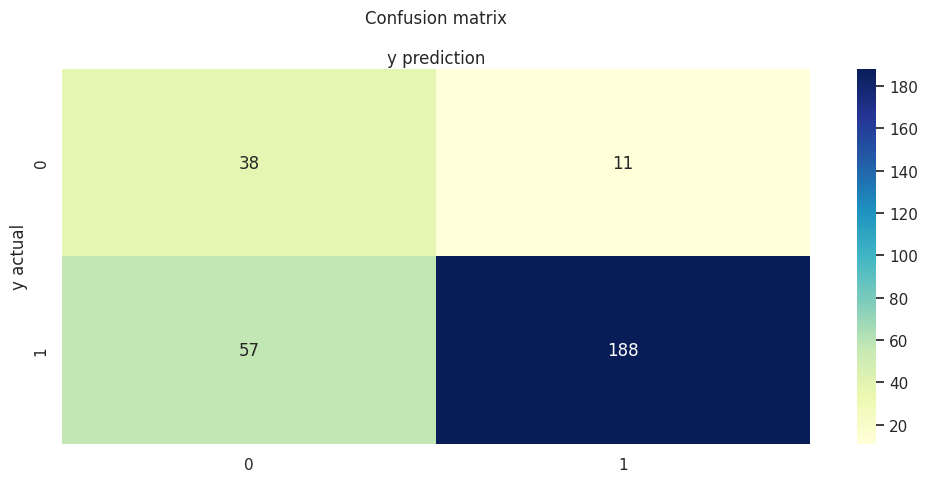

              precision    recall  f1-score   support

         0.0       0.40      0.78      0.53        49
         1.0       0.94      0.77      0.85       245

    accuracy                           0.77       294
   macro avg       0.67      0.77      0.69       294
weighted avg       0.85      0.77      0.79       294



In [46]:
plot(y_pred_lg)

## 2. Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train, smote_target)
y_pred = rfc.predict(X_test)

rfc_acc = metrics.accuracy_score(y_test, y_pred)
print ('accuracy',rfc_acc)

accuracy 0.9829931972789115


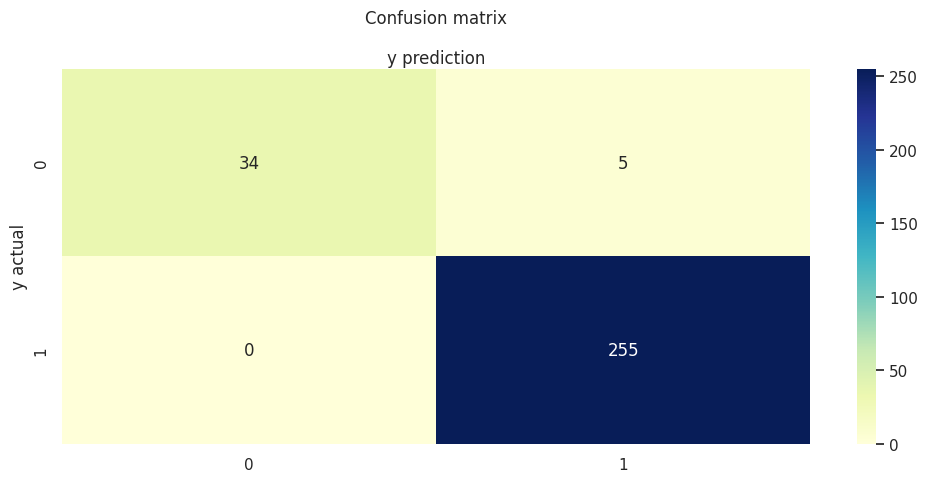

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.99      0.94      0.96       294
weighted avg       0.98      0.98      0.98       294



In [48]:
plot(y_pred)

## 3. Gradient Boosting Classifier

In [49]:
seed=0
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0}

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
gb_predictions = gb.predict(X_test)

gb_acc = metrics.accuracy_score(y_test, gb_predictions)
print('accuracy', gb_acc)

accuracy 0.9795918367346939


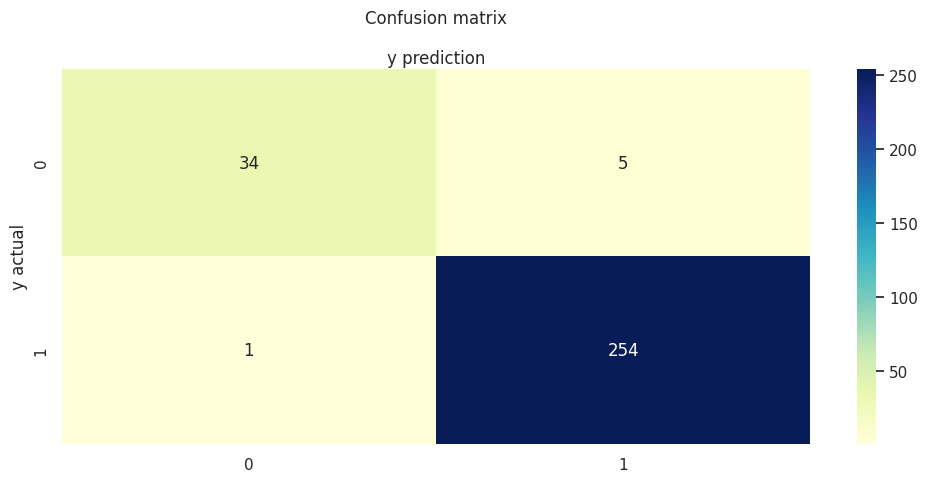

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.98      0.93      0.95       294
weighted avg       0.98      0.98      0.98       294



In [50]:
plot(gb_predictions)

## 4. AdaBoost Classifier

In [51]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada = ada.fit(smote_train, smote_target)
ada_predictions = ada.predict(X_test)

ada_acc = metrics.accuracy_score(y_test, ada_predictions)
print('accuracy',ada_acc)

accuracy 0.8639455782312925


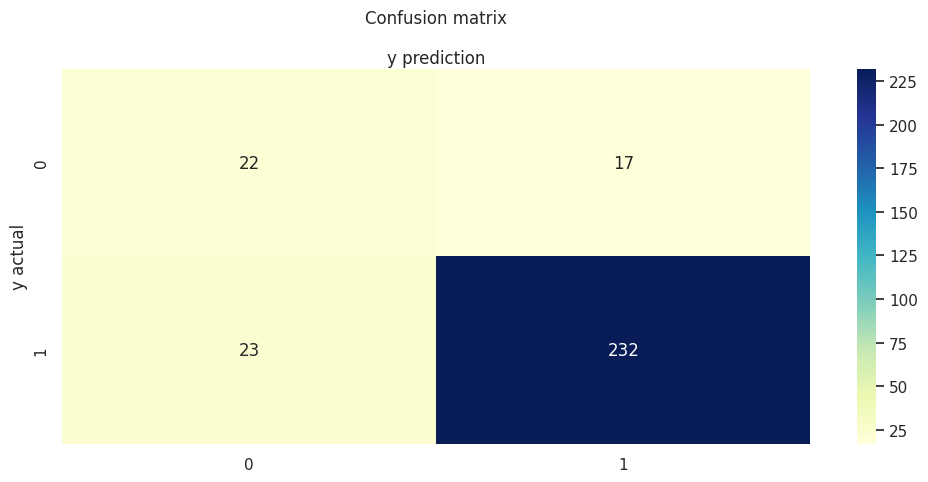

              precision    recall  f1-score   support

         0.0       0.49      0.56      0.52        39
         1.0       0.93      0.91      0.92       255

    accuracy                           0.86       294
   macro avg       0.71      0.74      0.72       294
weighted avg       0.87      0.86      0.87       294



In [52]:
plot(ada_predictions)

## 5. Gaussian Process Classifier

In [53]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier()
gpc = gpc.fit(smote_train, smote_target)
gpc_pred = gpc.predict(X_test)

gpc_acc = metrics.accuracy_score(y_test, gpc_pred)
print('accuracy',gpc_acc)

accuracy 0.9013605442176871


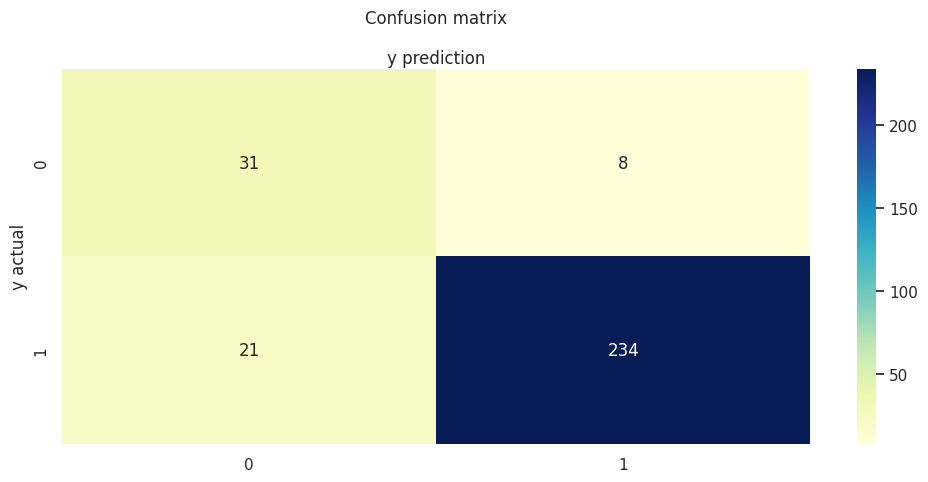

              precision    recall  f1-score   support

         0.0       0.60      0.79      0.68        39
         1.0       0.97      0.92      0.94       255

    accuracy                           0.90       294
   macro avg       0.78      0.86      0.81       294
weighted avg       0.92      0.90      0.91       294



In [54]:
plot(gpc_pred)

In [55]:
# Adding the scores to a dataframe

model_scores = {
    "Model" : ['Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Gaussian Process Classifier'], 
    "Accuracy" : [log_reg_acc, rfc_acc, gb_acc, ada_acc, gpc_acc]
}

model_details = pd.DataFrame(model_scores)
model_details_sorted = model_details.sort_values('Accuracy', ascending=False)
model_details_sorted.head()

,Model,Accuracy
1,Random Forest Classifier,0.982993
2,Gradient Boosting Classifier,0.979592
4,Gaussian Process Classifier,0.901361
3,AdaBoost Classifier,0.863946
0,Logistic Regression,0.768707


Hence, we can see that both Random Forest and Gradient Boosting Classifiers provide a high level of accuracy

### Key Findings
* Gender Disparity: Males exhibit a higher attrition rate compared to females, hinting at potential disparities in job satisfaction, career opportunities, and workplace environment.

* Age Dynamics: Attrition rates vary across different age groups, with individuals between 28-32 experiencing the highest attrition. This trend declines with advancing age, indicating a shift towards job stability and long-term commitments as individuals progress in their careers.

* Income Levels: Attrition rates are influenced by income levels, with significant spikes observed at very low income levels and a gradual decrease as income rises. This underscores the importance of financial stability in employee retention.

* Job Satisfaction: Lower levels of job satisfaction correlate with higher attrition rates, particularly among employees with average monthly salaries of 4596. Conversely, higher satisfaction levels, especially among those earning 6853, contribute to employee retention.

* Departmental Differences: The Sales department exhibits the highest attrition rate, followed by Human Resources, while Research and Development demonstrate lower rates. This suggests variations in work culture, opportunities, and satisfaction levels across departments.

* Job Role Impact: Higher-level job roles show lower attrition rates compared to lower-level roles, indicating the importance of career advancement opportunities and job stability in retaining talent.

* Salary Increment Influence: Enhanced salary increments serve as a significant incentive for retention, motivating employees to perform better and remain committed to the organization.

* Educational Background: Individuals with higher education levels, such as master's and doctorate degrees, demonstrate lower attrition rates, highlighting the value of specialized skills and advanced qualifications in job satisfaction and retention.

* Salary and Stock Options: Salary and stock options serve as significant motivators for employees, leading to higher loyalty and reduced attrition rates. Employees who receive higher pay and more stock options are more likely to remain committed to their organization, highlighting the importance of competitive compensation packages in retaining talent.

* Work-Life Balance: Work-life balance emerges as a crucial factor influencing employee motivation and retention. While a good work-life balance is often considered a motivation factor, it can also lead employees to seek better opportunities and a higher standard of living elsewhere. Balancing work demands with personal life priorities is essential for maintaining employee satisfaction and reducing turnover.

### Other observations include:

* Single employees demonstrate a higher rate of departure compared to their married and divorced counterparts.

* Approximately 10% of employees leave upon reaching their 2-year anniversary with the company.

* Employees who are loyal, hold higher salaries, and assume more responsibilities exhibit a lower likelihood of leaving compared to their peers.

* Individuals residing farther away from their workplace exhibit a higher likelihood of leaving compared to those who live closer.

* Employees who frequently travel for work display a higher propensity to leave compared to their counterparts.

* Those required to work overtime demonstrate a higher likelihood of leaving compared to those who do not.

* Sales representatives comprise a significant proportion of leavers within the dataset.

* Employees with a history of working at multiple companies in the past exhibit a higher likelihood of leaving compared to their counterparts.

### Recommendations

1. Ensure equal opportunities for all genders, addressing potential disparities in job satisfaction and career advancement.

2. Provide support and development opportunities for employees in their late twenties to early thirties to improve retention during this pivotal career phase.

3. Adjust salary structures to offer competitive compensation, particularly for lower income levels, enhancing financial stability and reducing turnover.

4. Prioritize initiatives to enhance job satisfaction, such as recognition programs and skill development opportunities.

5. Assess and address factors contributing to higher attrition in departments like Sales and Human Resources, improving workload management and work culture.

6. Provide clear career paths and skill development opportunities for lower-level roles to increase job stability.

7. Review and optimize salary increment policies and offer competitive compensation packages, including stock options, to motivate loyalty.

8. Implement policies promoting work-life balance, such as flexible work arrangements and wellness programs, to improve satisfaction and reduce turnover.

9. Address specific factors such as support for single employees, workload management for anniversary dates, and challenges faced by employees who live far or travel frequently.

10. Implementing these strategies will help mitigate attrition rates and retain valuable talent, contributing to long-term organizational success.